# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [ ]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np


Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [13]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [14]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [15]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

In [16]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = plt.cm.get_cmap('Greys'))

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [17]:
#Preproceso los datos, que vienen en numpy array
#Aplano a 1D la imagen 
# Escalo, para no afectar al descenso de gradiente ( al paso del explorador)
#!!Ojo¡¡ esta celda se se ejecuta una sola vez, ¡O volverá a escalar!
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

y_train = y_train.astype('float32') #El target no se Estandariza(media=0 y desviación 1)/Escalar(0-1), en imagenes se 'escala' porque los valores de los colores no son negativos
y_test = y_test.astype('float32')

In [18]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [19]:
# Reserva 10000 muestras para validación (es "test", no validación cruzada)
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

print(X_val)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax, porque tengo un clasificador multiclase.

In [20]:
#una manera de declarar la red neuronal

#Siempre hay que declarar la capa secuencial para empezar a declarar la red
#Se trata de la API sequential
model = keras.models.Sequential()

#Como tengo imágenes, Flatten aplana en un único vector. Y especificamos el tamaño de la entrada 
#ES como se hiciera un reshape(-1, 28*28)
# "kernel_initializer" o "bias_initializcer" no los usamos, pero sería para inicializar los pesos de otra manera

model.add(keras.layers.Flatten(input_shape= (28, 28)))

#Capas de la red. "Dense" es la capa de neuronas. Necesitamos número t activación
model.add(keras.layers.Dense(units= 300, #Número de neuronas de la capa
                             activation= 'relu')) #función de activación ==> 'relu'

model.add(keras.layers.Dense(units= 100,
                             activation= 'relu'))

#Capa de salida 'output', con tamaño del número de clases
#Suele ir aquí un 'softmax', por ser un clasificador multiclase. Si fuera binario==> sigmoide
model.add(keras.layers.Dense(10, activation= 'softmax'))

In [21]:
# Otra manera de declarar la red neuronal
capas = [
         keras.layers.Flatten(input_shape= (28, 28)),
         keras.layers.Dense(units= 300, activation= 'relu'),
         keras.layers.Dense(units= 100, activation= 'relu'),
         keras.layers.Dense(10, activation= 'softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [22]:
print(model.layers[1])
model.layers

# <tensorflow.python.keras.layers.core.Dense object at 0x0000023A4BE596C8> ==> dirección de memoria está en sexagesimal (no binario)

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [23]:
hidden1 = model.layers[1]

weights, biases = hidden1.get_weights()

#784 features (son los pixeles de las imágenes 28x28) x 300 neuronas
weights.shape

(784, 300)

In [24]:
#Es un array que contine
#Filas son las features --> en este caso 'pixeles'
#Columnas son las neuronas --> en este caso 1ªCapa de la CapaOculta
#Los datos son la primera estimación de los 'pesos'--> 'w'
weights 

array([[-0.02503003,  0.02233458,  0.00335804, ...,  0.00187667,
        -0.05851764, -0.06410214],
       [ 0.03497028,  0.00485102, -0.04969045, ...,  0.00663608,
         0.04775665,  0.0726824 ],
       [ 0.04835919, -0.0539555 , -0.0552985 , ..., -0.05701909,
         0.00235255,  0.06190611],
       ...,
       [-0.0362298 ,  0.05634883, -0.03381608, ..., -0.04900797,
         0.05982126,  0.00623932],
       [ 0.06805401,  0.00628578, -0.04713081, ..., -0.05145019,
        -0.06466473, -0.02385642],
       [ 0.02625576,  0.00176747, -0.04307977, ...,  0.0192062 ,
        -0.04527424, -0.02446054]], dtype=float32)

In [25]:
biases #La primera estimación del bias --> se suele poner a '0'

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
hidden2 = model.layers[2]
weights2, biases2 = hidden2.get_weights()

In [27]:
weights2.shape #300 filas de las salidas de las neuronas de la 1ªcapa oculta y 100 columnas son el número de neuronas de la 2ªCapa oculta

(300, 100)

In [28]:
weights2

array([[-0.08877539, -0.08126951, -0.10615155, ..., -0.06530077,
        -0.03531842, -0.11270857],
       [ 0.0827386 , -0.07584026, -0.06215877, ..., -0.03475098,
         0.03749809, -0.02086065],
       [ 0.04477312,  0.11240669, -0.02152008, ..., -0.11879648,
         0.03649475,  0.12119503],
       ...,
       [-0.1087044 ,  0.08358862,  0.02235272, ...,  0.0435731 ,
         0.03654698,  0.08695566],
       [ 0.0112633 ,  0.0771757 ,  0.03220902, ..., -0.02579116,
        -0.08106762, -0.03974073],
       [-0.06356569, -0.00512061, -0.10265824, ..., -0.03835565,
        -0.12122235,  0.11355669]], dtype=float32)

In [29]:
biases2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [30]:
biases2.shape

(100,)

Hasta aquí, sólo se ha creado la red neuronal, a partir de ahora se empieza a ejecutar.

Establecemos la configuración de ejecución... el compile.

In [31]:
#Se especifica la configuración del entremamiento (optimizador, pérdida, métricas)

model.compile(
    # Stochactic gradient descent. El algoritmo para la 'loss function'
    # El stochastic va haciendo unh muestreo en cada evaluación, no usa todo los registros para ser mucho más rápido.
    #Podemos modificar el 'learning rate' (0.01 por defecto) mediante el parametro 'lr' --> cuanto se mueve (el paso) el explorador=='bolita' a la hora de encontrar el descenso de gradiente
             optimizer= keras.optimizers.SGD(),

    #Loss function to minimize
    #sparse_categorical_crossentropy cuando tenemos un label en una columna
    #Si lo tuviéramos en varios tipos dummy, cogeríamos 'categorical_crossentropy'
             loss= keras.losses.SparseCategoricalCrossentropy(),

    #List of metrics to monitor
            metrics= [keras.metrics.SparseCategoricalAccuracy()]
)

In [32]:
# Equivalente
model.compile(optimizer= 'sgd',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

In [33]:
# Summary
# La primera hidden layer tiene 785 x 300 salidas (((28 x 28)+1)x 300)
# 300 x (784 +1) = 300 x 785
# En la primera son 235500 params = 784 x 300 + 300 bias 
model.summary()

#Los 'params' son los pesos

# vengo de 300 neuronas y voy a la sieguente de 100 neuronas + 100 'w0'(bias) = 30100
# vengo de 100 neuronas x 10 neuronas en la capa de salida + 10 'w0'(bias) = 1010

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [34]:
# Entrenamos el modelo con un batch_size de 64 imágenes por cada iteración,
# 10 'epochs' y expecificando cuál es el conjunto de validación

print('Fit model on training data')
history = model.fit(
                    X_train,
                    y_train,
                    batch_size= 64, #número de muestras empleadas en el entrenamiento con SGD (Stochactic gradient descent)
                    epochs= 15, #1 por defecto. Insuficiente. Número de vueltas del backpropagation

                    #Le pasamos validadción para monitorizar el coste 'loss' y las métricas, al final de cada época
                    # En vez de validation data podemos usar el argumento 'validation_split=0.1'
                    validation_data= (X_val, y_val)
                    )


Fit model on training data
Epoch 1/15
782/782 [==============================] - 3s 4ms/step - loss: 1.3699 - accuracy: 0.6261 - val_loss: 0.3936 - val_accuracy: 0.8929
Epoch 2/15
782/782 [==============================] - 2s 3ms/step - loss: 0.3989 - accuracy: 0.8898 - val_loss: 0.3141 - val_accuracy: 0.9097
Epoch 3/15
782/782 [==============================] - 2s 3ms/step - loss: 0.3212 - accuracy: 0.9071 - val_loss: 0.2687 - val_accuracy: 0.9243
Epoch 4/15
782/782 [==============================] - 2s 3ms/step - loss: 0.2872 - accuracy: 0.9182 - val_loss: 0.2447 - val_accuracy: 0.9300
Epoch 5/15
782/782 [==============================] - 2s 3ms/step - loss: 0.2577 - accuracy: 0.9273 - val_loss: 0.2317 - val_accuracy: 0.9330
Epoch 6/15
782/782 [==============================] - 3s 3ms/step - loss: 0.2418 - accuracy: 0.9325 - val_loss: 0.2170 - val_accuracy: 0.9385
Epoch 7/15
782/782 [==============================] - 3s 3ms/step - loss: 0.2228 - accuracy: 0.9365 - val_loss: 0.1992 - 

In [48]:
keras.__version__

'2.4.0'

In [ ]:
'''
En el entrenamiento solo hay que fijarse en que el 'loss' va para abajo, es bueno.
Si vemos que no baja más, no serán necesarias tantas 'epochs'.
Imprime tantas lineas como 'epochs' hayamos puesto.

Tampoco usamos el class-weight, que le
'''

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [52]:
print('Fit model on training data')
history = model.fit(
                    X_train,
                    y_train,
                    batch_size= 64, #número de muestras empleadas en el entrenamiento con SGD (Stochactic gradient descent)
                    epochs= 15, #1 por defecto. Insuficiente. Número de vueltas del backpropagation

                    #Le pasamos validadción para monitorizar el coste 'loss' y las métricas, al final de cada época
                    # En vez de validation data podemos usar el argumento 'validation_split=0.1'
                    validation_data= (X_val, y_val)
                    )

Fit model on training data
Epoch 1/15
782/782 [==============================] - 3s 4ms/step - loss: 0.0695 - sparse_categorical_accuracy: 0.9808 - val_loss: 0.0987 - val_sparse_categorical_accuracy: 0.9724
Epoch 2/15
782/782 [==============================] - 3s 4ms/step - loss: 0.0673 - sparse_categorical_accuracy: 0.9816 - val_loss: 0.0948 - val_sparse_categorical_accuracy: 0.9744
Epoch 3/15
782/782 [==============================] - 3s 3ms/step - loss: 0.0650 - sparse_categorical_accuracy: 0.9826 - val_loss: 0.0938 - val_sparse_categorical_accuracy: 0.9733
Epoch 4/15
782/782 [==============================] - 3s 3ms/step - loss: 0.0628 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0919 - val_sparse_categorical_accuracy: 0.9742
Epoch 5/15
782/782 [==============================] - 3s 3ms/step - loss: 0.0607 - sparse_categorical_accuracy: 0.9838 - val_loss: 0.0939 - val_sparse_categorical_accuracy: 0.9733
Epoch 6/15
782/782 [==============================] - 3s 3ms/step - loss:

In [ ]:
#Existe un parametro en el entrenamiento 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [58]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 15, 'steps': 782}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


{'loss': [0.06952016800642014,
  0.06733613461256027,
  0.06496383994817734,
  0.06283000856637955,
  0.06070169433951378,
  0.05888614431023598,
  0.056833863258361816,
  0.055036142468452454,
  0.05327682942152023,
  0.05155342444777489,
  0.049970727413892746,
  0.04838721826672554,
  0.04684576764702797,
  0.0453510656952858,
  0.04395854100584984],
 'sparse_categorical_accuracy': [0.9807999730110168,
  0.9816399812698364,
  0.9826400279998779,
  0.983299970626831,
  0.9838399887084961,
  0.9843000173568726,
  0.9851599931716919,
  0.9851199984550476,
  0.9861000180244446,
  0.9865999817848206,
  0.987060010433197,
  0.987559974193573,
  0.9882199764251709,
  0.9886400103569031,
  0.9890199899673462],
 'val_loss': [0.09874770790338516,
  0.0947728306055069,
  0.09378749132156372,
  0.09186579287052155,
  0.09392223507165909,
  0.09253397583961487,
  0.09002429991960526,
  0.0898885652422905,
  0.09116300940513611,
  0.08605966717004776,
  0.08828633278608322,
  0.0857173353433609,


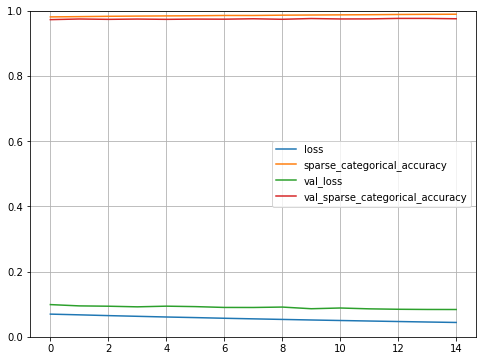

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

#Podemos ver como evoluciona el entrenamiento en función de las época
#Validación y training  están muy cerca, no hay overfitting!!
#Todavía no ha acabado de converger ya que 

pd.DataFrame(history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [60]:
# obtenemos el score a partir del test
# evaluamos el modelo con el test usando 'evaluate'
print("Evaluate on test data")

#Método "evaluate" para que nos dé el error vs las métricas elegidas en la función 'compile'
result = model.evaluate(X_test, y_test)
print("test_loss, test_accyarcy ", result)

Evaluate on test data
313/313 [==============================] - 0s 2ms/step - loss: 0.0823 - sparse_categorical_accuracy: 0.9753
test_loss, test_accyarcy  [0.08229940384626389, 0.9753000140190125]


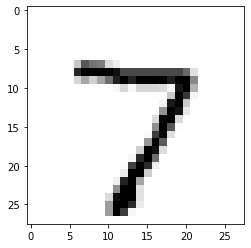

In [61]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [68]:
'''
!Ojo¡ aquí presupone que le entran varios inputs
Nos dá la probabilidad de pertenecer a una clase o a otra
'''

predictions = model.predict(X_test[:1]).round(4)
print('Prediction shape', predictions.shape)
predictions 
# Eso que es el array de probabilida el indice[7] == el valor con probabilidad 0.9996 de que sea el número 7
# Eso que es el array de probabilida el indice[3] == el valor con probabilidad 0.0003 de que sea el número 3
# Eso que es el array de probabilida el indice[2] == el valor con probabilidad 0.0001 de que sea el número 2

Prediction shape (1, 10)


array([[0.000e+00, 0.000e+00, 1.000e-04, 3.000e-04, 0.000e+00, 0.000e+00,
        0.000e+00, 9.996e-01, 0.000e+00, 0.000e+00]], dtype=float32)

In [67]:
predictions.max()

0.9996

In [65]:
predictions.argmax()

7

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [5]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [6]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler() #EStandarizamos
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [8]:
model = keras.models.Sequential([
    
    # No hace falta capa de flatten, no hay que aplanar ninguna imagen
    keras.layers.Dense(30, activation='relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train, y_train, epochs = 20,
                   validation_data = (X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # fingimos que
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.4010 - val_loss: 0.5358
Epoch 2/20
363/363 [==============================] - 0s 793us/step - loss: 0.5567 - val_loss: 0.5474
Epoch 3/20
363/363 [==============================] - 0s 770us/step - loss: 0.4714 - val_loss: 0.4798
Epoch 4/20
363/363 [==============================] - 0s 981us/step - loss: 0.4274 - val_loss: 0.4619
Epoch 5/20
363/363 [==============================] - 0s 731us/step - loss: 0.4170 - val_loss: 0.4475
Epoch 6/20
363/363 [==============================] - 0s 825us/step - loss: 0.4043 - val_loss: 0.4408
Epoch 7/20
363/363 [==============================] - 0s 790us/step - loss: 0.4087 - val_loss: 0.4345
Epoch 8/20
363/363 [==============================] - 0s 829us/step - loss: 0.3772 - val_loss: 0.4211
Epoch 9/20
363/363 [==============================] - 0s 770us/step - loss: 0.3932 - val_loss: 0.4234
Epoch 10/20
363/363 [==============================] - 0s 862us/step - loss: 0.3842 

In [9]:
history.history

{'loss': [1.0211070775985718,
  0.7555654048919678,
  0.4626983106136322,
  0.43009600043296814,
  0.4163006544113159,
  0.4052938222885132,
  0.3975934088230133,
  0.3908200263977051,
  0.39058101177215576,
  0.38047319650650024,
  0.38380542397499084,
  0.37586480379104614,
  0.3753783404827118,
  0.3712320625782013,
  0.3902142643928528,
  0.3747830390930176,
  0.3675793409347534,
  0.36402514576911926,
  0.3632621467113495,
  0.36479854583740234],
 'val_loss': [0.5357934832572937,
  0.5473999977111816,
  0.47980597615242004,
  0.4618742763996124,
  0.44750741124153137,
  0.4407542049884796,
  0.4345124363899231,
  0.4210914671421051,
  0.4234374165534973,
  0.4126475155353546,
  0.4124032258987427,
  0.40717804431915283,
  0.41208407282829285,
  0.42846739292144775,
  0.4078614413738251,
  0.41907939314842224,
  0.4003358483314514,
  0.3991067409515381,
  0.39887139201164246,
  0.39785662293434143]}

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [10]:
model.save('my_keras_model.h5') #Se llama archivo==> artefacto

In [11]:
# Lo volvemos a cargar
model = keras.models.load_model('my_keras_model.h5')

# con sklearn tenemos pickle y también joblib==> es más eficiente

### Callbacks
Sirven para que el modelo se vaya guardando tras cada epoch, asi no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [12]:
checkpoint_callbacks = keras.callbacks.ModelCheckpoint('callback_model.h5')
history = model.fit(X_train, y_train, epochs= 10, callbacks=[checkpoint_callbacks])

history = model.fit(X_train, 
                    y_train,
                    epochs=20,
                    validation_data= (X_valid, y_valid),
                    callbacks= [checkpoint_callbacks])

Epoch 1/10
363/363 [==============================] - 0s 577us/step - loss: 0.3687
Epoch 2/10
363/363 [==============================] - 0s 554us/step - loss: 0.3618
Epoch 3/10
363/363 [==============================] - 0s 613us/step - loss: 0.3843
Epoch 4/10
363/363 [==============================] - 0s 741us/step - loss: 0.3614
Epoch 5/10
363/363 [==============================] - 0s 705us/step - loss: 0.3718
Epoch 6/10
363/363 [==============================] - 0s 568us/step - loss: 0.3583
Epoch 7/10
363/363 [==============================] - 0s 620us/step - loss: 0.3541
Epoch 8/10
363/363 [==============================] - 0s 780us/step - loss: 0.3593
Epoch 9/10
363/363 [==============================] - 0s 676us/step - loss: 0.3572
Epoch 10/10
363/363 [==============================] - 0s 628us/step - loss: 0.3511
Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3773 - val_loss: 0.3843
Epoch 2/20
363/363 [==============================] - 0s 821us/step -

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [13]:
# 10 es un valor bueno para definir el 'early stop'

early_stopping_callback = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights= True)#Registra en el callback del modelo la epoca que ha registrado el mejor valor. E ingnora las 5 últimas épocas donde no ha mejorado el score

history = model.fit(X_train, 
                    y_train, 
                    epochs= 100,
                    validation_data= (X_valid, y_valid),
                    callbacks= [checkpoint_callbacks, early_stopping_callback] )

Epoch 1/100
363/363 [==============================] - 0s 945us/step - loss: 0.3289 - val_loss: 0.3686
Epoch 2/100
363/363 [==============================] - 0s 774us/step - loss: 0.3356 - val_loss: 0.3597
Epoch 3/100
363/363 [==============================] - 0s 854us/step - loss: 0.3304 - val_loss: 0.3562
Epoch 4/100
363/363 [==============================] - 0s 887us/step - loss: 0.3282 - val_loss: 0.3573
Epoch 5/100
363/363 [==============================] - 0s 846us/step - loss: 0.3266 - val_loss: 0.3558
Epoch 6/100
363/363 [==============================] - 0s 850us/step - loss: 0.3260 - val_loss: 0.3781
Epoch 7/100
363/363 [==============================] - 0s 829us/step - loss: 0.3259 - val_loss: 0.4620
Epoch 8/100
363/363 [==============================] - 0s 872us/step - loss: 0.3287 - val_loss: 0.3562
Epoch 9/100
363/363 [==============================] - 0s 980us/step - loss: 0.3287 - val_loss: 0.3554
Epoch 10/100
363/363 [==============================] - 0s 845us/step - l

### Dashboard
Keras tiene implementado un dashboard para monitorizar las ejecuciones del modelo

In [14]:
import os

# Crea este directorio
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

# Guarda una carpeta nueva con la fecha de la ejecucion
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [15]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3190 - val_loss: 0.3496
Epoch 2/50
363/363 [==============================] - 0s 873us/step - loss: 0.3175 - val_loss: 0.3468
Epoch 3/50
363/363 [==============================] - 0s 828us/step - loss: 0.3156 - val_loss: 0.3465
Epoch 4/50
363/363 [==============================] - 0s 867us/step - loss: 0.3157 - val_loss: 0.3483
Epoch 5/50
363/363 [==============================] - 0s 891us/step - loss: 0.3134 - val_loss: 0.3487
Epoch 6/50
363/363 [==============================] - 0s 871us/step - loss: 0.3137 - val_loss: 0.3496
Epoch 7/50
363/363 [==============================] - 0s 816us/step - loss: 0.3152 - val_loss: 0.3406
Epoch 8/50
363/363 [==============================] - 0s 831us/step - loss: 0.3133 - val_loss: 0.3441
Epoch 9/50
363/363 [==============================] - 0s 856us/step - loss: 0.3167 - val_loss: 0.3486
Epoch 10/50
363/363 [==============================] - 0s 811us/step - loss: 0.3252 

In [16]:
'''
Para lanzarlo desde el jupyter notebook
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Para lanzarlo desde el terminal, hay que estar en la carpeta de los logs
tensorboard --logdir=./my_logs --port=6006

'''

'\nPara lanzarlo desde el jupyter notebook\n%load_ext tensorboard\n%tensorboard --logdir=./my_logs --port=6006\n\nPara lanzarlo desde el terminal, hay que estar en la carpeta de los logs\ntensorboard --logdir=./my_logs --port=6006\n\n'

In [17]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 1648.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=C:/Users/pilar/my_logs --port=6006


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Launching TensorBoard...

In [48]:
!dir

 El volumen de la unidad C es OS
 El n�mero de serie del volumen es: B0E8-DAF5

 Directorio de c:\Users\pilar\Edition_Jun2020\Repositorios_GitHub\activity_bootcamp_jun2020\2_Machine_Learning\semana_28\d�a_3\Redes Neuronales 1

06/02/2021  15:35    <DIR>          .
06/02/2021  15:35    <DIR>          ..
05/02/2021  20:58            11.771 1-Perceptron & MLP.ipynb
06/02/2021  16:18           157.482 2-Keras.ipynb
06/02/2021  09:15            40.316 2-Keras_viernes5feb.ipynb
06/02/2021  16:16            15.928 callback_model.h5
05/02/2021  18:12            17.577 Deep Learning classification.ipynb
05/02/2021  18:12            14.253 Deep learning regression.ipynb
05/02/2021  18:20    <DIR>          img
06/02/2021  16:15            16.968 my_keras_model.h5
06/02/2021  16:17    <DIR>          my_logs
05/02/2021  18:12         5.101.485 Neural networks - Intro.pptx
05/02/2021  20:01         5.107.987 Neural networks - Intro_annot.pptx
               9 archivos     10.483.767 bytes
          